In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\FrzKemal\AppData\Local\Temp\ipykernel_12436\4244551283.py:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10386,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.945136e+07,1.945136e+07,False,NaN,1,NaN,NaN,None,2023-08-08T11:49:00.000Z,29318.489021,1.417024e+10,64.9185,0.229969,0.964156,1.559907,-3.206697,10.030829,5.990536,5.702845e+11,48.8699,6.156883e+11,None,2023-08-08T11:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 11:55:45.009033
1,1027,Ethereum,ETH,ethereum,7222,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201592e+08,1.201592e+08,True,NaN,2,NaN,NaN,None,2023-08-08T11:49:00.000Z,1833.008236,5.713030e+09,58.8870,0.093699,0.071314,0.148341,-1.947944,-0.634036,-0.945147,2.202529e+11,18.8733,2.202529e+11,None,2023-08-08T11:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 11:55:45.009033
2,825,Tether USDt,USDT,tether,59103,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.357864e+10,8.668426e+10,True,NaN,3,NaN,NaN,None,2023-08-08T11:49:00.000Z,0.998953,2.369327e+10,41.6807,0.019653,0.083423,-0.054877,-0.135130,-0.121565,-0.141081,8.349110e+10,7.1543,8.659347e+10,None,2023-08-08T11:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-08 11:55:45.009033
3,1839,BNB,BNB,bnb,1559,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538537e+08,1.538537e+08,False,NaN,4,NaN,NaN,None,2023-08-08T11:49:00.000Z,243.319270,4.167538e+08,8.9649,0.050958,0.584729,-0.630409,3.573062,-6.680194,-21.886872,3.743558e+10,3.2078,3.743558e+10,None,2023-08-08T11:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 11:55:45.009033
4,52,XRP,XRP,xrp,1025,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.274129e+10,9.998854e+10,False,NaN,5,NaN,NaN,None,2023-08-08T11:49:00.000Z,0.619302,1.306484e+09,23.8619,0.481750,0.139156,-10.025682,31.801465,17.264731,45.284145,3.266277e+10,2.7989,6.193017e+10,None,2023-08-08T11:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 11:55:45.009033
5,3408,USD Coin,USDC,usd-coin,13545,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.615486e+10,2.615486e+10,False,NaN,6,NaN,NaN,None,2023-08-08T11:49:00.000Z,1.000222,3.008412e+09,46.6634,0.018794,0.020883,0.024080,0.010053,0.019595,0.024891,2.616067e+10,2.2418,2.616067e+10,None,2023-08-08T11:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-08 11:55:45.009033
6,74,Dogecoin,DOGE,dogecoin,762,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.405046e+11,1.405046e+11,True,NaN,7,NaN,NaN,None,2023-08-08T11:49:00.000Z,0.073719,3.237238e+08,9.2184,0.269946,-0.999816,-3.958275,11.791007,8.350603,1.258493,1.035780e+10,0.8876,1.035780e+10,None,2023-08-08T11:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 11:55:45.009033
7,2010,Cardano,ADA,cardano,888,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.502770e+10,3.604578e+10,False,NaN,8,NaN,NaN,None,2023-08-08T11:49:00.000Z,0.292363,2.993871e+08,66.8700,0.365406,-0.031517,-4.002960,1.970442,-7.900519,-18.376523,1.024081e+10,0.8775,1.315634e+10,None,2023-08-08T11:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 11:55:45.009033
8,5426,Solana,SOL,solana,496,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.057473e+08

In [14]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\FrzKemal\Desktop\Data Analyst Portfolio\Python\Python Script\API.csv'):
        df.to_csv(r'C:\Users\FrzKemal\Desktop\Data Analyst Portfolio\Python\Python Script\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\FrzKemal\Desktop\Data Analyst Portfolio\Python\Python Script\API.csv', mode='a', header=False)
    
# If that didn't work try using the local host URL as shown in the video

In [15]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\FrzKemal\AppData\Local\Temp\ipykernel_12436\3432779614.py:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


C:\Users\FrzKemal\AppData\Local\Temp\ipykernel_12436\3432779614.py:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


KeyboardInterrupt: 

In [16]:
df72 = pd.read_csv(r'C:\Users\FrzKemal\Desktop\Data Analyst Portfolio\Python\Python Script\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10386,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.945140e+07,1.945140e+07,False,NaN,1,NaN,NaN,NaN,2023-08-08T12:41:00.000Z,29484.093493,1.466030e+10,65.8620,0.532643,1.678414,2.011762,-2.749191,10.600637,5.541669,5.735069e+11,48.9956,6.191660e+11,NaN,2023-08-08T12:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 12:43:16.027316
1,1,1027,Ethereum,ETH,ethereum,7222,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201592e+08,1.201592e+08,True,NaN,2,NaN,NaN,NaN,2023-08-08T12:41:00.000Z,1838.207552,5.859186e+09,59.3949,0.298978,0.501602,0.187887,-2.092871,-0.544190,-1.602658,2.208776e+11,18.8666,2.208776e+11,NaN,2023-08-08T12:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 12:43:16.027316
2,2,825,Tether USDt,USDT,tether,59107,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.357864e+10,8.668426e+10,True,NaN,3,NaN,NaN,NaN,2023-08-08T12:41:00.000Z,0.999258,2.401100e+10,40.1029,0.046056,0.105759,-0.026099,-0.093460,-0.087581,-0.126403,8.351658e+10,7.1337,8.661990e+10,NaN,2023-08-08T12:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-08 12:43:16.027316
3,3,1839,BNB,BNB,bnb,1559,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.538537e+08,1.538537e+08,False,NaN,4,NaN,NaN,NaN,2023-08-08T12:41:00.000Z,243.682479,4.171271e+08,7.8539,0.161047,0.765596,-0.638274,3.564102,-7.242858,-22.470762,3.749145e+10,3.2024,3.749145e+10,NaN,2023-08-08T12:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 12:43:16.027316
4,4,52,XRP,XRP,xrp,1025,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.274129e+10,9.998854e+10,False,NaN,5,NaN,NaN,NaN,2023-08-08T12:41:00.000Z,0.622439,1.289435e+09,17.7295,0.522008,0.754163,-9.674253,32.380339,16.717105,44.416918,3.282821e+10,2.8060,6.224386e+10,NaN,2023-08-08T12:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 12:43:16.027316
5,5,3408,USD Coin,USDC,usd-coin,13545,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.614595e+10,2.614595e+10,False,NaN,6,NaN,NaN,NaN,2023-08-08T12:41:00.000Z,1.000301,3.100078e+09,48.6230,0.021682,0.008961,0.038351,0.018249,0.023431,0.035870,2.615383e+10,2.2355,2.615383e+10,NaN,2023-08-08T12:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-08 12:43:16.027316
6,6,74,Dogecoin,DOGE,dogecoin,762,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.405056e+11,1.405056e+11,True,NaN,7,NaN,NaN,NaN,2023-08-08T12:41:00.000Z,0.073941,3.221314e+08,8.2737,0.318087,-0.306920,-4.111716,11.991592,6.699783,0.478046,1.038906e+10,0.8881,1.038906e+10,NaN,2023-08-08T12:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 12:43:16.027316
7,7,2010,Cardano,ADA,cardano,888,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.502770e+10,3.604578e+10,False,NaN,8,NaN,NaN,NaN,2023-08-08T12:41:00.000Z,0.293432,2.945463e+08,54.1044,0.347632,0.080282,-3.889970,1.908343,-8.795230,-19.462830,1.027824e+10,0.8779,1.320443e+10,NaN,2023-08-08T12:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 12:43:16.027316
8,8,5426,Solana,SOL,solana,496,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4

In [17]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10386,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.945140e+07,1.945140e+07,False,NaN,1,NaN,NaN,None,2023-08-08T12:42:00.000Z,29481.787171,1.466860e+10,66.0148,0.519978,1.675807,2.088918,-2.762880,10.611376,5.457917,5.734620e+11,48.9918,6.191175e+11,None,2023-08-08T12:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 12:44:17.599277
1,1027,Ethereum,ETH,ethereum,7222,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201592e+08,1.201592e+08,True,NaN,2,NaN,NaN,None,2023-08-08T12:42:00.000Z,1838.009651,5.860314e+09,59.4080,0.284019,0.516991,0.252433,-2.124727,-0.556680,-1.714279,2.208538e+11,18.8646,2.208538e+11,None,2023-08-08T12:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 12:44:17.599277
2,825,Tether USDt,USDT,tether,59107,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.357864e+10,8.668426e+10,True,NaN,3,NaN,NaN,None,2023-08-08T12:42:00.000Z,0.999083,2.401455e+10,40.0871,0.027709,0.101598,-0.043026,-0.108465,-0.097088,-0.146999,8.350200e+10,7.1325,8.660477e+10,None,2023-08-08T12:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-08 12:44:17.599277
3,1839,BNB,BNB,bnb,1559,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538537e+08,1.538537e+08,False,NaN,4,NaN,NaN,None,2023-08-08T12:42:00.000Z,243.711843,4.171848e+08,7.8827,0.170240,0.784184,-0.616149,3.572152,-7.232012,-22.459153,3.749597e+10,3.2028,3.749597e+10,None,2023-08-08T12:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 12:44:17.599277
4,52,XRP,XRP,xrp,1025,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.274129e+10,9.998854e+10,False,NaN,5,NaN,NaN,None,2023-08-08T12:42:00.000Z,0.622505,1.289665e+09,17.7230,0.532657,0.771819,-9.660636,32.404907,16.729380,44.436358,3.283171e+10,2.8027,6.225049e+10,None,2023-08-08T12:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 12:44:17.599277
5,3408,USD Coin,USDC,usd-coin,13545,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.614595e+10,2.614595e+10,False,NaN,6,NaN,NaN,None,2023-08-08T12:42:00.000Z,1.000209,3.100188e+09,48.5979,0.008300,0.018207,0.026783,0.010603,0.015939,0.023353,2.615141e+10,2.2324,2.615141e+10,None,2023-08-08T12:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-08 12:44:17.599277
6,74,Dogecoin,DOGE,dogecoin,762,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.405056e+11,1.405056e+11,True,NaN,7,NaN,NaN,None,2023-08-08T12:42:00.000Z,0.073944,3.220491e+08,8.2534,0.326258,-0.303989,-4.099588,11.997830,6.695972,0.484741,1.038959e+10,0.8871,1.038959e+10,None,2023-08-08T12:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 12:44:17.599277
7,2010,Cardano,ADA,cardano,888,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.502770e+10,3.604578e+10,False,NaN,8,NaN,NaN,None,2023-08-08T12:42:00.000Z,0.293464,2.945480e+08,54.0628,0.358947,0.097023,-3.879841,1.910994,-8.790222,-19.448806,1.027938e+10,0.8780,1.320590e+10,None,2023-08-08T12:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 12:44:17.599277
8,5426,Solana,SOL,solana,496,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.057472e+08,5

In [18]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [19]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10386,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19451400.00000,19451400.00000,False,NaN,1,NaN,NaN,None,2023-08-08T12:42:00.000Z,29481.78717,14668600639.41777,66.01480,0.51998,1.67581,2.08892,-2.76288,10.61138,5.45792,573462034968.37231,48.99180,619117530580.62000,None,2023-08-08T12:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 12:44:17.599277
1,1027,Ethereum,ETH,ethereum,7222,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120159238.27993,120159238.27993,True,NaN,2,NaN,NaN,None,2023-08-08T12:42:00.000Z,1838.00965,5860313855.23448,59.40800,0.28402,0.51699,0.25243,-2.12473,-0.55668,-1.71428,220853839673.36600,18.86460,220853839673.37000,None,2023-08-08T12:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 12:44:17.599277
2,825,Tether USDt,USDT,tether,59107,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83578639639.68036,86684257831.30505,True,NaN,3,NaN,NaN,None,2023-08-08T12:42:00.000Z,0.99908,24014545861.88873,40.08710,0.02771,0.10160,-0.04303,-0.10846,-0.09709,-0.14700,83501997349.56372,7.13250,86604767664.13000,None,2023-08-08T12:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-08 12:44:17.599277
3,1839,BNB,BNB,bnb,1559,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153853714.81467,153853714.81467,False,NaN,4,NaN,NaN,None,2023-08-08T12:42:00.000Z,243.71184,417184792.05858,7.88270,0.17024,0.78418,-0.61615,3.57215,-7.23201,-22.45915,37495972354.52679,3.20280,37495972354.53000,None,2023-08-08T12:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 12:44:17.599277
4,52,XRP,XRP,xrp,1025,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52741286353.00000,99988538151.00000,False,NaN,5,NaN,NaN,None,2023-08-08T12:42:00.000Z,0.62250,1289664602.05465,17.72300,0.53266,0.77182,-9.66064,32.40491,16.72938,44.43636,32831709126.31016,2.80270,62250489884.84000,None,2023-08-08T12:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 12:44:17.599277
5,3408,USD Coin,USDC,usd-coin,13545,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,26145954252.62542,26145954252.62542,False,NaN,6,NaN,NaN,None,2023-08-08T12:42:00.000Z,1.00021,3100187800.43250,48.59790,0.00830,0.01821,0.02678,0.01060,0.01594,0.02335,26151406780.72603,2.23240,26151406780.73000,None,2023-08-08T12:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-08 12:44:17.599277
6,74,Dogecoin,DOGE,dogecoin,762,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,140505626383.70523,140505626383.70523,True,NaN,7,NaN,NaN,None,2023-08-08T12:42:00.000Z,0.07394,322049096.19759,8.25340,0.32626,-0.30399,-4.09959,11.99783,6.69597,0.48474,10389585884.67885,0.88710,10389585884.68000,None,2023-08-08T12:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 12:44:17.599277
7,2010,Cardano,ADA,cardano,888,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35027696305.25100,36045784123.04600,False,NaN,8,NaN,NaN,None,2023-08-08T12:42:00.000Z,0.29346,294548039.13242,54.06280,0.35895,0.09702,-3.87984,1.91099,-8.79022,-19.44881,10279382476.43961,0.87800,13205898766.75000,None,2023-08-08T12:42:00.000Z,NaN,NaN

In [20]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.51998,1.67581,2.08892,-2.76288,10.61138,5.45792
Ethereum,0.28402,0.51699,0.25243,-2.12473,-0.55668,-1.71428
Tether USDt,0.02771,0.10160,-0.04303,-0.10846,-0.09709,-0.14700
BNB,0.17024,0.78418,-0.61615,3.57215,-7.23201,-22.45915
XRP,0.53266,0.77182,-9.66064,32.40491,16.72938,44.43636
USD Coin,0.00830,0.01821,0.02678,0.01060,0.01594,0.02335
Dogecoin,0.32626,-0.30399,-4.09959,11.99783,6.69597,0.48474
Cardano,0.35895,0.09702,-3.87984,1.91099,-8.79022,-19.44881
Solana,0.68568,1.88644,-0.04336,7.78840,21.96701,11.34045


In [21]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.51998
             quote.USD.percent_change_24h     1.67581
             quote.USD.percent_change_7d      2.08892
             quote.USD.percent_change_30d    -2.76288
             quote.USD.percent_change_60d    10.61138
             quote.USD.percent_change_90d     5.45792
Ethereum     quote.USD.percent_change_1h      0.28402
             quote.USD.percent_change_24h     0.51699
             quote.USD.percent_change_7d      0.25243
             quote.USD.percent_change_30d    -2.12473
             quote.USD.percent_change_60d    -0.55668
             quote.USD.percent_change_90d    -1.71428
Tether USDt  quote.USD.percent_change_1h      0.02771
             quote.USD.percent_change_24h     0.10160
             quote.USD.percent_change_7d     -0.04303
             quote.USD.percent_change_30d    -0.10846
             quote.USD.percent_change_60d    -0.09709
             quote.USD.percent_change_90

In [23]:
type(df4)

pandas.core.series.Series

In [24]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.51998
            quote.USD.percent_change_24h   1.67581
            quote.USD.percent_change_7d    2.08892
            quote.USD.percent_change_30d  -2.76288
            quote.USD.percent_change_60d  10.61138
            quote.USD.percent_change_90d   5.45792
Ethereum    quote.USD.percent_change_1h    0.28402
            quote.USD.percent_change_24h   0.51699
            quote.USD.percent_change_7d    0.25243
            quote.USD.percent_change_30d  -2.12473
            quote.USD.percent_change_60d  -0.55668
            quote.USD.percent_change_90d  -1.71428
Tether USDt quote.USD.percent_change_1h    0.02771
            quote.USD.percent_change_24h   0.10160
            quote.USD.percent_change_7d   -0.04303
            quote.USD.percent_change_30d  -0.10846
            quote.USD.percent_change_60d  -0.09709
            quote.USD.percent_change_90d  -0.14700
BNB         quote.USD.percent_change_1h    0.17024
            quote.USD.percent_change_24h   0.78418
            quote.USD.percent_change_7d   -0.61615
            quote.USD.percent_change_30d   3.57215
            quote.USD.percent_change_60d  -7.23201
            quote.USD.percent_change_90d -22.45915
XRP         quote.USD.percent_change_1h    0.53266
            quote.USD.percent_change_24h   0.77182
            quote.USD.percent_change_7d   -9.66064
            quote.USD.percent_change_30d  32.40491
            quote.USD.percent_change_60d  16.72938
            quote.USD.percent_change_90d  44.43636
USD Coin    quote.USD.percent_change_1h    0.00830
            quote.USD.percent_change_24h   0.01821
            quote.USD.percent_change_7d    0.02678
            quote.USD.percent_change_30d   0.01060
            quote.USD.percent_change_60d   0.01594
            quote.USD.percent_change_90d   0.02335
Dogecoin    quote.USD.percent_change_1h    0.32626
            quote.USD.percent_change_24h  -0.30399
            quote.USD.percent_change_7d   -4.09959
            quote.USD.percent_change_30d  11.99783
            quote.USD.percent_change_60d   6.69597
            quote.USD.percent_change_90d   0.48474
Cardano     quote.USD.percent_change_1h    0.35895
            quote.USD.percent_change_24h   0.09702
            quote.USD.percent_change_7d   -3.87984
            quote.USD.percent_change_30d   1.91099
            quote.USD.percent_change_60d  -8.79022
            quote.USD.percent_change_90d -19.44881
Solana      quote.USD.percent_change_1h    0.68568
            quote.USD.percent_change_24h   1.88644
            quote.USD.percent_change_7d   -0.04336
            quote.USD.percent_change_30d   7.78840
            quote.USD.percent_change_60d  21.96701
            quote.USD.percent_change_90d  11.34045
TRON        quote.USD.percent_change_1h    0.09991
            quote.USD.percent_change_24h   0.13641
            quote.USD.percent_change_7d   -1.99998
            quote.USD.percent_change_30d  -3.76469
            quote.USD.percent_change_60d  -1.99644
            quote.USD.percent_change_90d   9.37655
Polygon     quote.USD.percent_change_1h    0.16811
            quote.USD.percent_change_24h   0.82470
            quote.USD.percent_change_7d   -0.66828
            quote.USD.percent_change_30d  -3.01451
            quote.USD.percent_change_60d -13.72582
            quote.USD.percent_change_90d -24.12552
Polkadot    quote.USD.percent_change_1h    0.31651
            quote.USD.percent_change_24h   0.41350
            quote.USD.percent_change_7d   -1.53047
            quote.USD.percent_change_30d  -2.16802
            quote.USD.percent_change_60d  -0.87271
            quote.USD.percent_change_90d  -7.21804
Litecoin    quote.USD.percent_change_1h    0.26085
            quote.USD.percent_change_24h   0.39569
            quote.USD.percent_change_7d   -8.68326
            quote.USD.percent_change_30d -14.18970
            quote.USD.percent_change_60d  -7.07980
            quo

In [32]:
df5.count()

values    90
dtype: int64

In [45]:
index_values = range(0,90)
index = pd.Index(index_values)

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.51998
1,Bitcoin,quote.USD.percent_change_24h,1.67581
2,Bitcoin,quote.USD.percent_change_7d,2.08892
3,Bitcoin,quote.USD.percent_change_30d,-2.76288
4,Bitcoin,quote.USD.percent_change_60d,10.61138
5,Bitcoin,quote.USD.percent_change_90d,5.45792
6,Ethereum,quote.USD.percent_change_1h,0.28402
7,Ethereum,quote.USD.percent_change_24h,0.51699
8,Ethereum,quote.USD.percent_change_7d,0.25243
9,Ethereum,quote.USD.percent_change_30d,-2.12473


In [48]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.51998
1,Bitcoin,quote.USD.percent_change_24h,1.67581
2,Bitcoin,quote.USD.percent_change_7d,2.08892
3,Bitcoin,quote.USD.percent_change_30d,-2.76288
4,Bitcoin,quote.USD.percent_change_60d,10.61138
5,Bitcoin,quote.USD.percent_change_90d,5.45792
6,Ethereum,quote.USD.percent_change_1h,0.28402
7,Ethereum,quote.USD.percent_change_24h,0.51699
8,Ethereum,quote.USD.percent_change_7d,0.25243
9,Ethereum,quote.USD.percent_change_30d,-2.12473


In [54]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.51998
1,Bitcoin,24h,1.67581
2,Bitcoin,7d,2.08892
3,Bitcoin,30d,-2.76288
4,Bitcoin,60d,10.61138
5,Bitcoin,90d,5.45792
6,Ethereum,1h,0.28402
7,Ethereum,24h,0.51699
8,Ethereum,7d,0.25243
9,Ethereum,30d,-2.12473


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

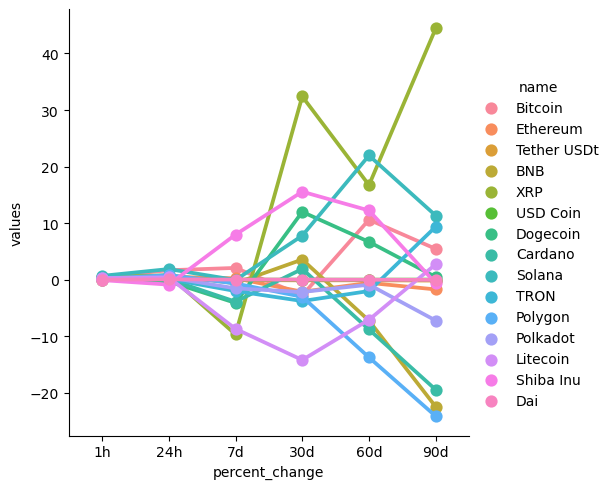

In [63]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [64]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,29481.78717,2023-08-08 12:44:17.599277


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

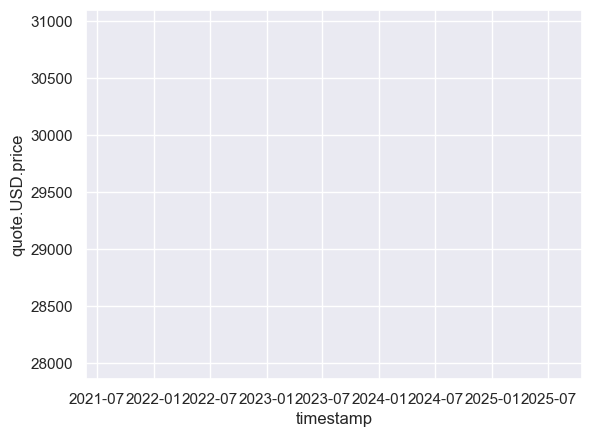

In [65]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)